In [21]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread
import argparse
image_rows = int(420)
image_cols = int(580)
def fetch_train_idx(train_data_path):
    names=os.listdir(train_data_path)
    d=dict([(x.split('.')[0],x.split('.')[0].endswith('mask')) for x in names])
    d1=sorted(d)
    l=len(d1)
    newimg=[]
    newmask=[]
    for i in range(l-1):
        if d1[i+1].endswith('mask'):
            newimg.append(d1[i]+'.tif')
            newmask.append(d1[i+1]+'.tif')
    return newimg, newmask

def create_train_data(data_path):
    train_data_path = os.path.join(data_path, 'train')
    images, mask4images = fetch_train_idx(train_data_path)
    
    total = len(images)

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name , mask_name in zip(images, mask4images) :

        img = imread(os.path.join(train_data_path, image_name), as_gray=True)
        img_mask = imread(os.path.join(train_data_path, mask_name), as_gray=True)

        img = np.array([img])
        img_mask = np.array([img_mask])
        
        imgs[i] = img
        imgs_mask[i] = img_mask
        #print('Loading done.')

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    

    np.save(data_path+'imgs_train.npy', imgs)
    np.save(data_path+'imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load(data_path+'imgs_train.npy')
    imgs_mask_train = np.load(data_path+'imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_test_data():
    train_data_path = os.path.join(data_path, 'test')
    images = os.listdir(train_data_path)
    total = int(len(images))

    imgs = np.ndarray((total, image_rows, image_cols),dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int32)

    i = 0
    print('-'*30)
    print('Creating test images...')
    print('-'*30)
    for image_name in images:
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(train_data_path, image_name), as_gray=True)

        img = np.array([img])

        imgs[i] = img
        imgs_id[i] = img_id

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
            print("shape so far", imgs.shape)
        i += 1
    print('Loading done.')

    np.save(data_path+'imgs_test.npy', imgs)
    np.save(data_path+'imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load(data_path+'imgs_test.npy')
    imgs_id = np.load(data_path+'imgs_id_test.npy')
    return imgs_test, imgs_id






In [22]:
data_path='./raw/'
#create_train_data(data_path)
create_test_data()

------------------------------
Creating test images...
------------------------------
Done: 0/5508 images
shape so far (5508, 420, 580)
Done: 100/5508 images
shape so far (5508, 420, 580)
Done: 200/5508 images
shape so far (5508, 420, 580)
Done: 300/5508 images
shape so far (5508, 420, 580)
Done: 400/5508 images
shape so far (5508, 420, 580)
Done: 500/5508 images
shape so far (5508, 420, 580)
Done: 600/5508 images
shape so far (5508, 420, 580)
Done: 700/5508 images
shape so far (5508, 420, 580)


c:\users\zecharpy\appdata\local\continuum\anaconda3\envs\py36_zbatchai\lib\site-packages\skimage\external\tifffile\tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


Done: 800/5508 images
shape so far (5508, 420, 580)
Done: 900/5508 images
shape so far (5508, 420, 580)
Done: 1000/5508 images
shape so far (5508, 420, 580)
Done: 1100/5508 images
shape so far (5508, 420, 580)
Done: 1200/5508 images
shape so far (5508, 420, 580)
Done: 1300/5508 images
shape so far (5508, 420, 580)
Done: 1400/5508 images
shape so far (5508, 420, 580)
Done: 1500/5508 images
shape so far (5508, 420, 580)
Done: 1600/5508 images
shape so far (5508, 420, 580)
Done: 1700/5508 images
shape so far (5508, 420, 580)
Done: 1800/5508 images
shape so far (5508, 420, 580)
Done: 1900/5508 images
shape so far (5508, 420, 580)
Done: 2000/5508 images
shape so far (5508, 420, 580)
Done: 2100/5508 images
shape so far (5508, 420, 580)
Done: 2200/5508 images
shape so far (5508, 420, 580)
Done: 2300/5508 images
shape so far (5508, 420, 580)
Done: 2400/5508 images
shape so far (5508, 420, 580)
Done: 2500/5508 images
shape so far (5508, 420, 580)
Done: 2600/5508 images
shape so far (5508, 420, 

shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


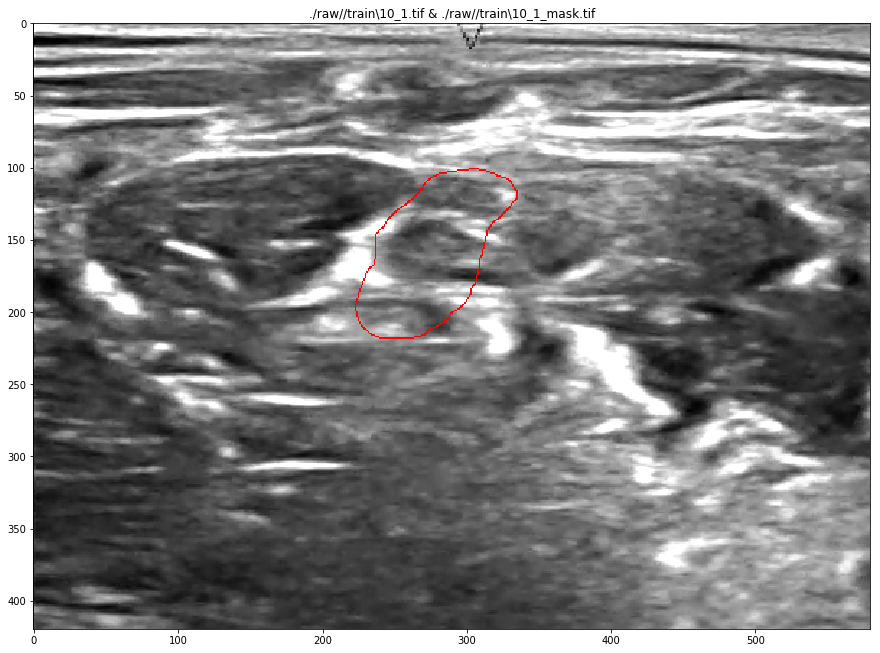

plotted: ./raw//train\10_1.tif & ./raw//train\10_1_mask.tif
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


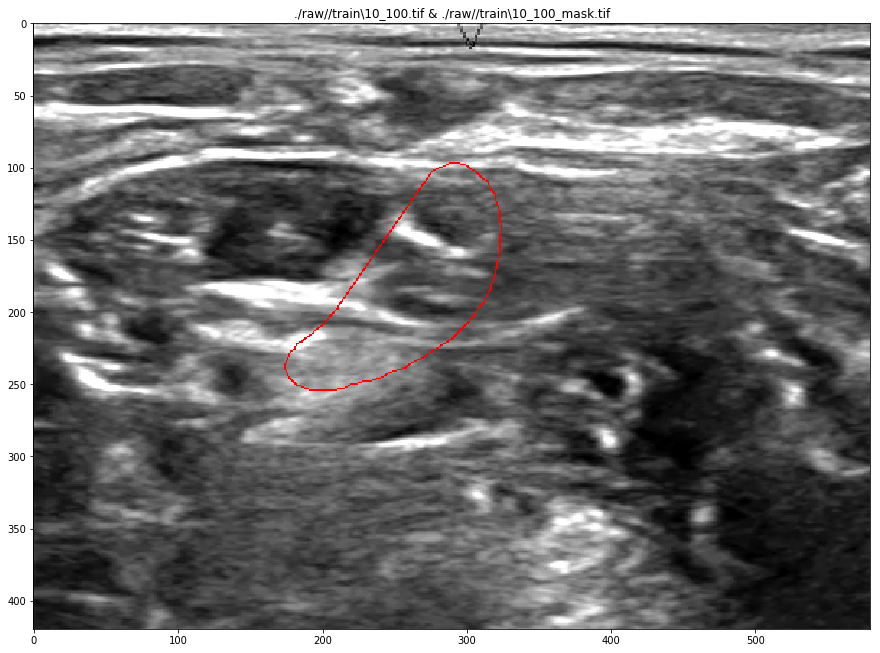

plotted: ./raw//train\10_100.tif & ./raw//train\10_100_mask.tif
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


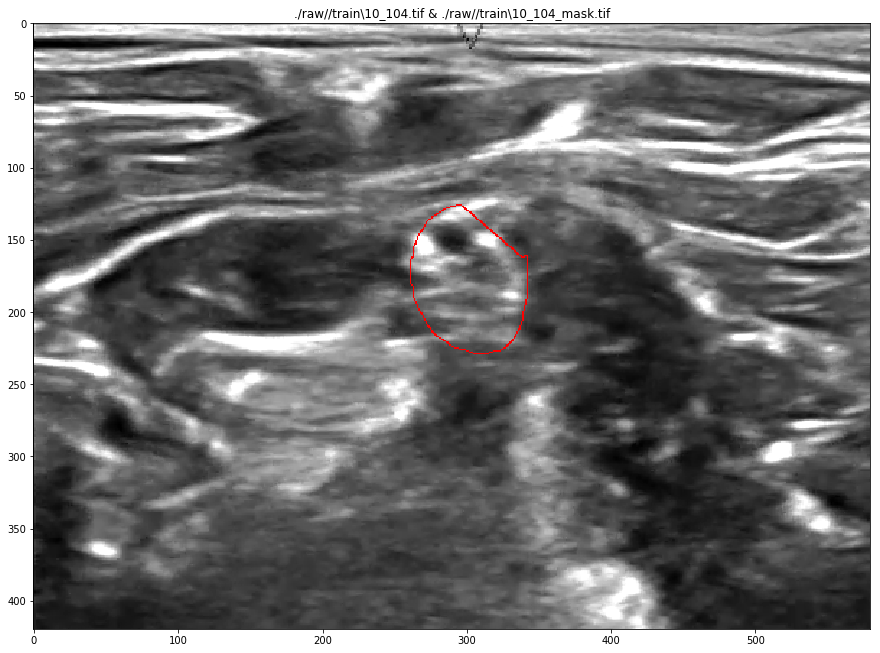

plotted: ./raw//train\10_104.tif & ./raw//train\10_104_mask.tif
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


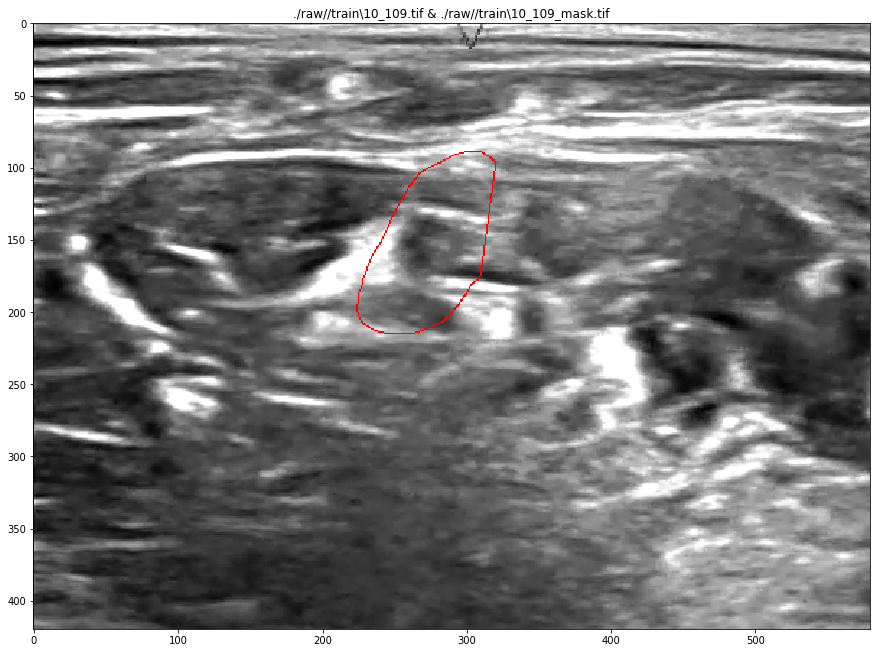

plotted: ./raw//train\10_109.tif & ./raw//train\10_109_mask.tif
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


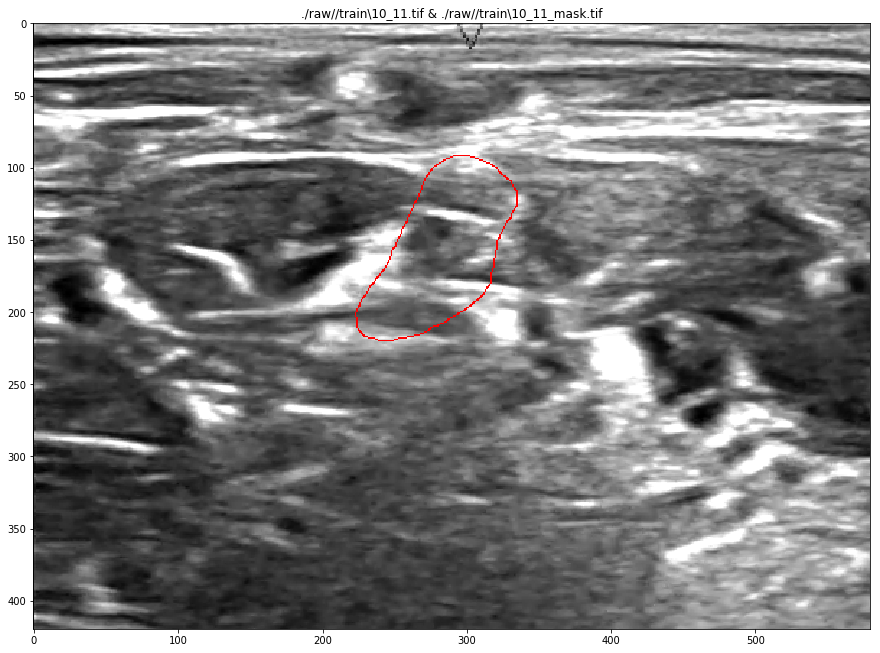

plotted: ./raw//train\10_11.tif & ./raw//train\10_11_mask.tif
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


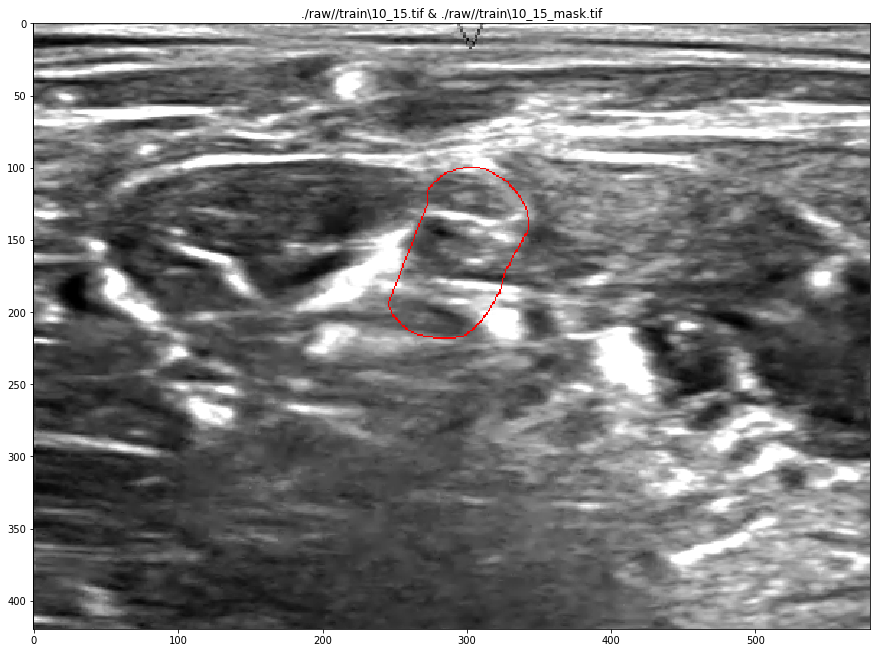

plotted: ./raw//train\10_15.tif & ./raw//train\10_15_mask.tif
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


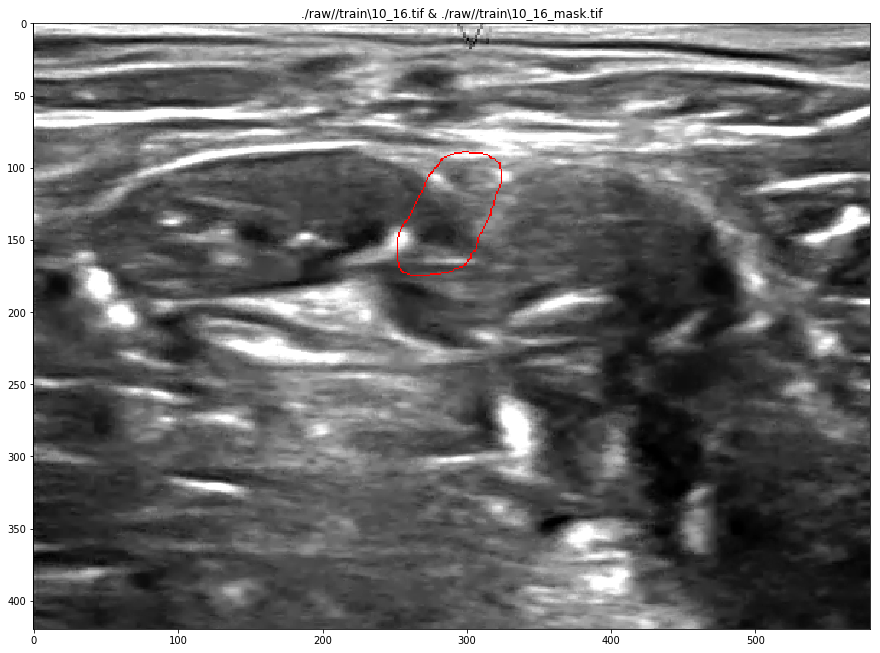

plotted: ./raw//train\10_16.tif & ./raw//train\10_16_mask.tif
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


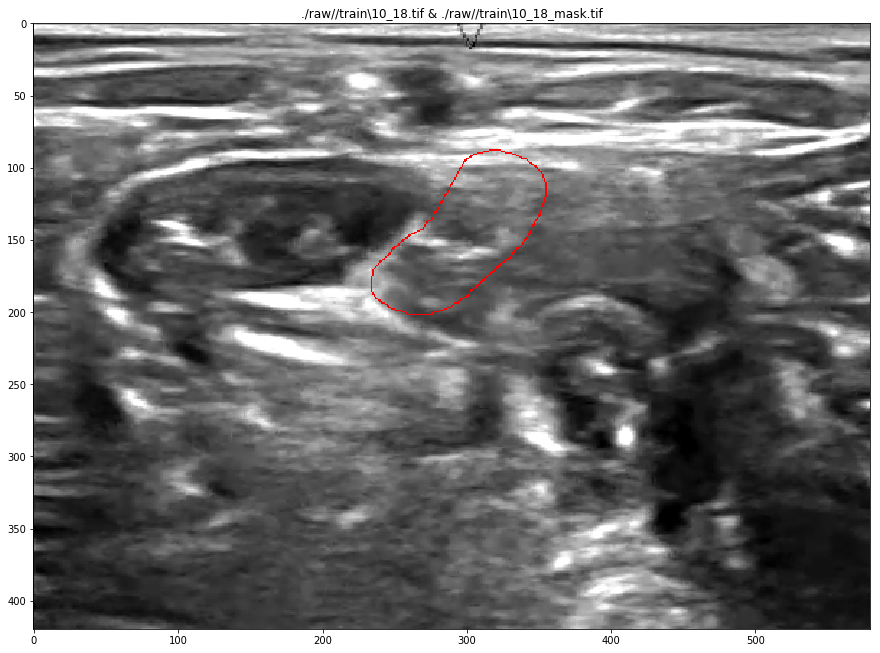

plotted: ./raw//train\10_18.tif & ./raw//train\10_18_mask.tif
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


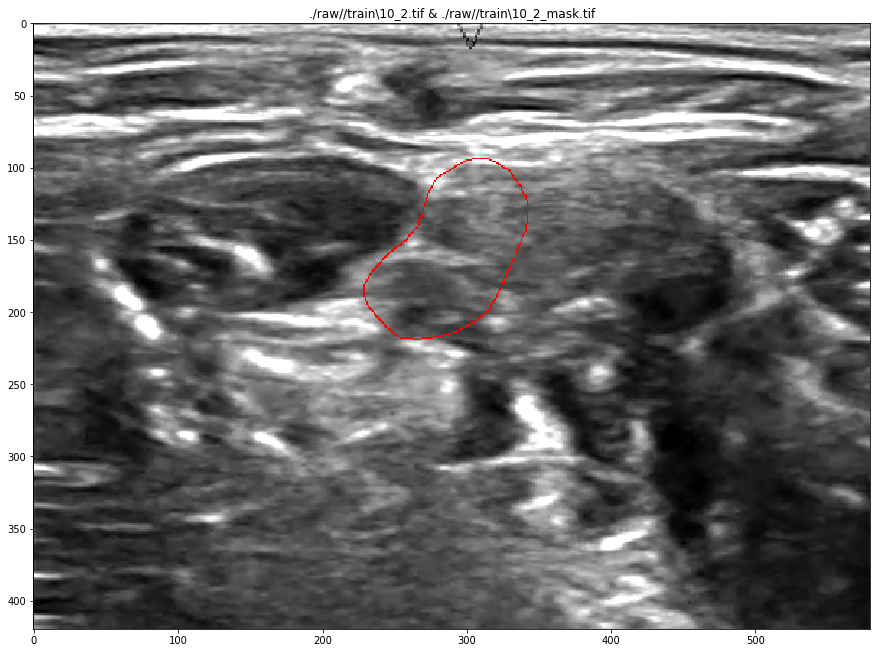

plotted: ./raw//train\10_2.tif & ./raw//train\10_2_mask.tif
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
shape of img and mask (420, 580) (420, 580)
types for ultrasound and mask uint8 uint8


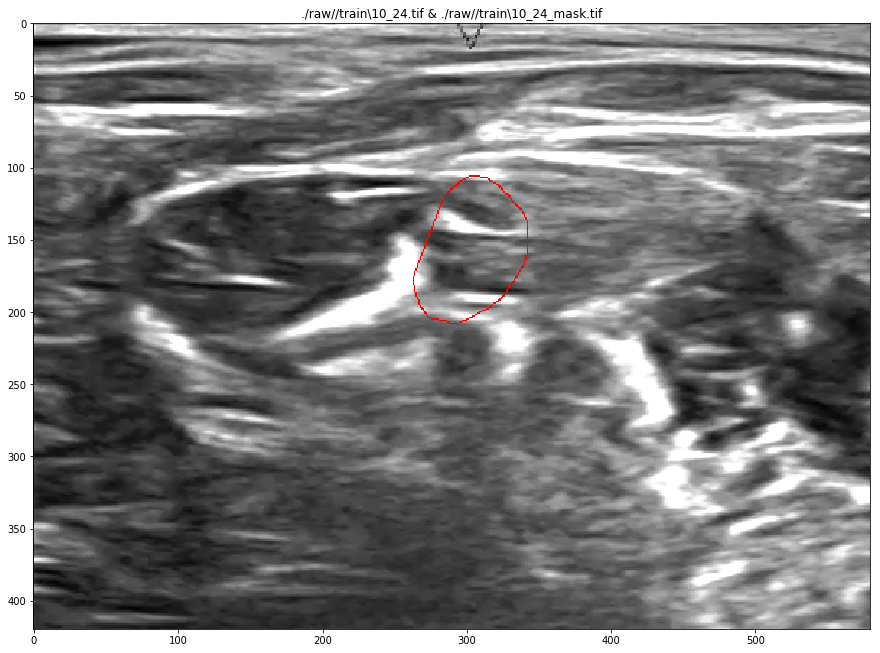

plotted: ./raw//train\10_24.tif & ./raw//train\10_24_mask.tif


In [61]:
#source citation: https://www.kaggle.com/chefele/plot-images-overlaid-with-mask/notebook
###plotting known image vs corresponding segmentation 
# This script loops through ultrasound images in the training set that have non-blank masks,
# and then plots each image, adding the edges of their respective masks in red.
# This should outline the BP nerves in the training images. 
# Chris Hefele, May 2016

IMAGES_TO_SHOW = 10  # configure to taste :)


import numpy as np
import matplotlib.pyplot as plt
import glob, os, os.path
import cv2


def image_with_mask(img, mask):
    # returns a copy of the image with edges of the mask added in red
    img_color = grays_to_RGB(img)
    mask_edges = cv2.Canny(mask, 100, 200) > 0  
    img_color[mask_edges, 0] = 255  # set channel 0 to bright red, green & blue channels to 0
    img_color[mask_edges, 1] = 0
    img_color[mask_edges, 2] = 0
    return img_color

def fimg_to_fmask(img_path):
    # convert an image file path into a corresponding mask file path 
    dirname, basename = os.path.split(img_path)
    maskname = basename.replace(".tif", "_mask.tif")
    return os.path.join(dirname, maskname)

def mask_not_blank(mask):
    return sum(mask.flatten()) > 0

def grays_to_RGB(img):
    # turn 2D grayscale image into grayscale RGB
    return np.dstack((img, img, img)) 

def plot_image(img, title=None, figsize=(15,20)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(img)
    plt.show()

def main(data_path):

    f_ultrasounds = [img for img in glob.glob(data_path+"/train/*.tif") if 'mask' not in img]
    # f_ultrasounds.sort()  
    f_masks       = [fimg_to_fmask(fimg) for fimg in f_ultrasounds]
    
    images_shown = 0 

    for f_ultrasound, f_mask in zip(f_ultrasounds, f_masks):
        
        img  = plt.imread(f_ultrasound)
        mask = plt.imread(f_mask)
        print("shape of img and mask",img.shape, mask.shape)

        if mask_not_blank(mask):

            # plot_image(grays_to_RGB(img),  title=f_ultrasound)
            # plot_image(grays_to_RGB(mask), title=f_mask)

            f_combined = f_ultrasound + " & " + f_mask 
            print("types for ultrasound and mask", img.dtype, mask.dtype)
            plot_image(image_with_mask(img, mask), title=f_combined)
            print('plotted:', f_combined)
            images_shown += 1

        if images_shown >= IMAGES_TO_SHOW:
            break

main(data_path)

------------------------------
Loading and preprocessing test data...
------------------------------


c:\users\zecharpy\appdata\local\continuum\anaconda3\envs\py36_zbatchai\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\zecharpy\appdata\local\continuum\anaconda3\envs\py36_zbatchai\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(5508, 96, 96, 1)

In [38]:
from __future__ import print_function
import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam

from keras import backend as K
import argparse
from data import load_test_data
K.set_image_data_format('channels_last')  # TF dimension ordering in this code

img_rows = 96
img_cols = 96
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p


# load json and create model
from keras.models import model_from_yaml
from keras.models import model_from_json
from keras import backend as K


# serialize model to JSON
import os
json_file = open('model_architecture.json', 'r')
loaded_model_json = json_file.read()
#json_file.close()

loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_weights.h5")
print("Loaded model from disk")
from keras.optimizers import Adam
loaded_model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])
##### load and compile the model 


Using TensorFlow backend.


Loaded model from disk


In [80]:
#### make prediction to get the mask 

def process_test_sample(data_path):
    imgs_test, imgs_id_test = load_test_data(data_path)
    imgs_test = preprocess(imgs_test)

    imgs_test = imgs_test.astype('float32')
    imgs_show=imgs_test
    mean = np.mean(imgs_test)  # mean for data centering
    std = np.std(imgs_test) 
    imgs_test -= mean
    imgs_test /= std
    return imgs_test, imgs_id_test, imgs_show

def make_prediction(test_img):
    print('-'*30)
    print('Loading and preprocessing test data...')
    print('Predicting masks on test data...')
    print('-'*30)
    test_img=np.expand_dims(test_img, axis=0)
    imgs_mask_test = loaded_model.predict(test_img, verbose=1)
    #np.save(data_path+'imgs_mask_test.npy', imgs_mask_test)
    return imgs_mask_test

#imgs_test=process_test_sample(data_path)



In [95]:
imgs_test, imgs_id_test,imgs_show=process_test_sample(data_path)

c:\users\zecharpy\appdata\local\continuum\anaconda3\envs\py36_zbatchai\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\zecharpy\appdata\local\continuum\anaconda3\envs\py36_zbatchai\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


ValueError: not enough values to unpack (expected 3, got 2)

idx 1.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 37ms/step


c:\users\zecharpy\appdata\local\continuum\anaconda3\envs\py36_zbatchai\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


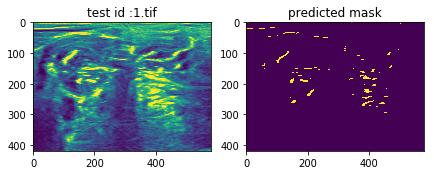

idx 10.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 72ms/step


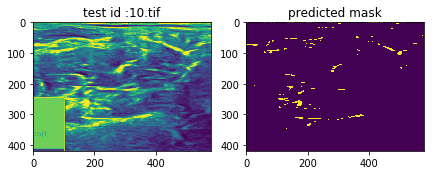

idx 100.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 55ms/step


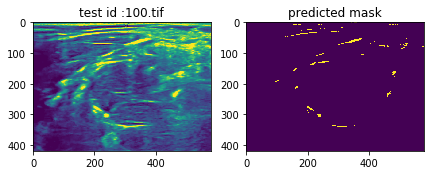

idx 1000.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 44ms/step


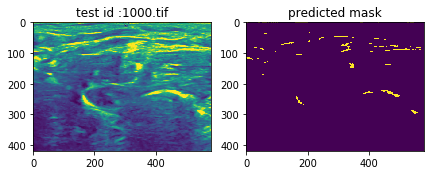

idx 1001.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 65ms/step


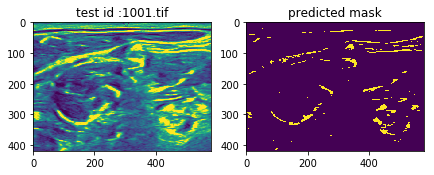

idx 1002.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 51ms/step


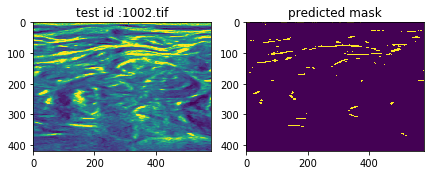

idx 1003.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 47ms/step


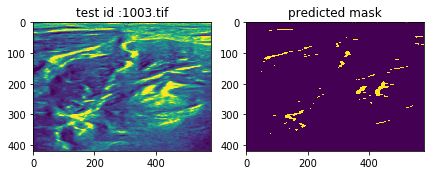

idx 1004.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 55ms/step


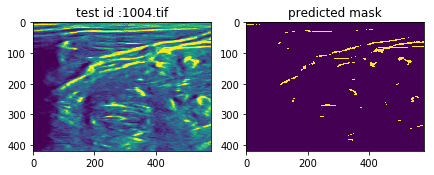

idx 1005.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 54ms/step


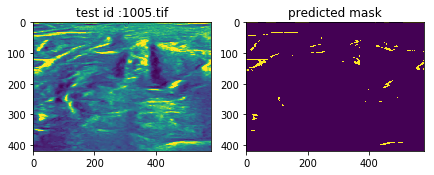

idx 1006.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 44ms/step


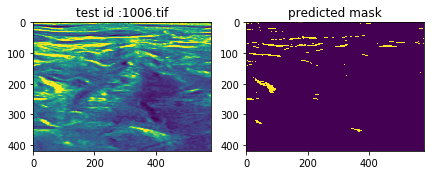

idx 1007.tif
------------------------------
Loading and preprocessing test data...
Predicting masks on test data...
------------------------------
1/1 [==============================] - 0s 63ms/step


In [94]:
import random
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
#imgs_id_test=imgs_id_test.tolist()
imgs_id_list=[str(idx)+'.tif' for idx in imgs_id_test ]
#test_samples=imgs_show[random.sample(range(1,5508),7)]
IMAGES_TO_SHOW= 5*2

f_ultrasounds = [img for img in imgs_show]

figsize(7, 5)
fig = plt.figure()


images_shown = 0 

for idx ,f_ultrasound in zip(imgs_id_list,f_ultrasounds):
    print("idx",idx)
    ## making prediction
    f_mask=make_prediction(imgs_test[int(idx.split('.')[0])])
    img  = plt.imread("./raw/test/"+idx)
    #print("img shape",img.shape)
    #print("ultra shape and mask shape", f_ultrasound.shape, f_mask.shape)
    if images_shown >= IMAGES_TO_SHOW:
        break
    
    if mask_not_blank(f_mask):
        f_combined = "image id: "+ str(idx) + "predicted segmentation"  
        img_color = grays_to_RGB(f_ultrasound)
        #print("shape", img_color.shape)
        f_ultrasound=f_ultrasound.astype(np.uint8)
        
        f_mask_resize = resize(img, ( 420,580 ),anti_aliasing=True)
        f_mask_resize=f_mask_resize.astype(np.uint8)
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("test id :{}".format(str(idx)))
        plt.subplot(1, 2, 2)
        plt.imshow(f_mask_resize)
        plt.title("predicted mask")
        plt.show()
        #print("ultra shape and mask shape", img.shape, f_mask_resize.shape)
        #plot_image(image_with_mask(img, f_mask_resize), title=f_combined)
        #print('plotted:', f_combined)
        images_shown += 1

    

In [57]:
imgs_id_test[:10]

[1, 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006]

In [ ]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
smooth=1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def get_model():

    inputs = Input(shape=(64, 64, 3))

    conv_1 = Conv2D(1, (3, 3), strides=(1, 1), padding='same')(inputs)
    act_1 = Activation('relu')(conv_1)

    conv_2 = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(act_1)
    act_2 = Activation('relu')(conv_2)

    deconv_1 = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same')(act_2)
    act_3 = Activation('relu')(deconv_1)

    merge_1 = concatenate([act_3, act_1], axis=3)

    deconv_2 = Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='same')(merge_1)
    act_4 = Activation('relu')(deconv_2)

    model = Model(inputs=[inputs], outputs=[act_4])

    model.compile(optimizer='adadelta', loss=dice_coef_loss, metrics=[dice_coef])

    return model 
model=get_model()
model.summary()

In [ ]:
from __future__ import print_function
import os
import numpy as np
from skimage.io import imsave, imread, imshow
from matplotlib import pyplot as plt

data_path = './raw/'
train_data_path = os.path.join(data_path, 'train')
imgs=os.listdir(train_data_path)
img=imread(os.path.join(train_data_path, imgs[0]), as_grey=True)
imshow(img)